In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
IMAGE_SIZE = [224, 224]

In [5]:
#Give dataset path
train_path = "C:/Users/Dhruv/Desktop/TL_brain-tumor/Skin Cancer_dataset/train"
test_path = "C:/Users/Dhruv/Desktop/TL_brain-tumor/Skin Cancer_dataset/test"

Working with 1440 images
Image examples: 
100.jpg


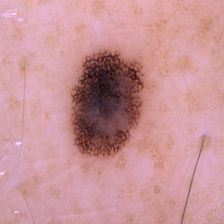

1000.jpg


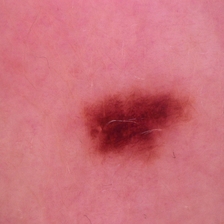

1001.jpg


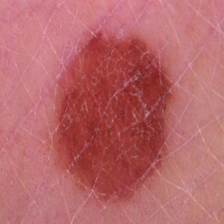

1002.jpg


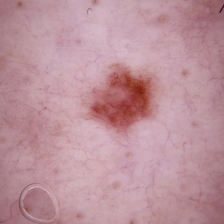

1004.jpg


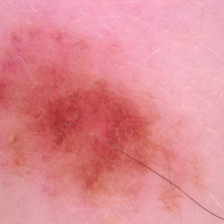

1005.jpg


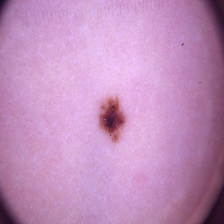

1007.jpg


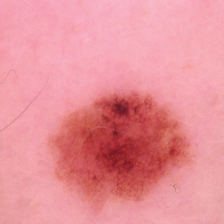

1008.jpg


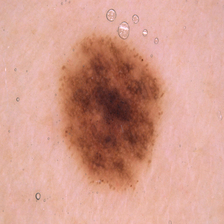

1009.jpg


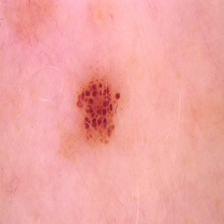

101.jpg


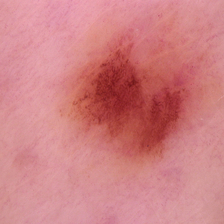

In [6]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58892288/58889256 [==============================] - 6s 0us/step


In [8]:
vgg.input


<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [15]:
folders = glob("C:/Users/Dhruv/Desktop/TL_brain-tumor/Skin Cancer_dataset/train/*")
print(len(folders))

2


In [16]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [18]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [19]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [20]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [28]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [30]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [37]:
from datetime import datetime

start = datetime.now()

model_history = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
  verbose=2
)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
5/5 - 67s - loss: 7.5727 - accuracy: 0.5063 - val_loss: 6.9714 - val_accuracy: 0.5455
Epoch 2/10
5/5 - 10s - loss: 6.1348 - accuracy: 0.6000
Epoch 3/10
5/5 - 10s - loss: 6.7100 - accuracy: 0.5625
Epoch 4/10
5/5 - 10s - loss: 7.0934 - accuracy: 0.5375
Epoch 5/10
5/5 - 10s - loss: 6.9975 - accuracy: 0.5437
Epoch 6/10
5/5 - 10s - loss: 8.5313 - accuracy: 0.4437
Epoch 7/10
5/5 - 10s - loss: 6.4224 - accuracy: 0.5813
Epoch 8/10
5/5 - 10s - loss: 7.1893 - accuracy: 0.5312
Epoch 9/10
5/5 - 10s - loss: 7.4768 - accuracy: 0.5125
Epoch 10/10
5/5 - 10s - loss: 6.9975 - accuracy: 0.5437
Training completed in time:  0:03:07.436654


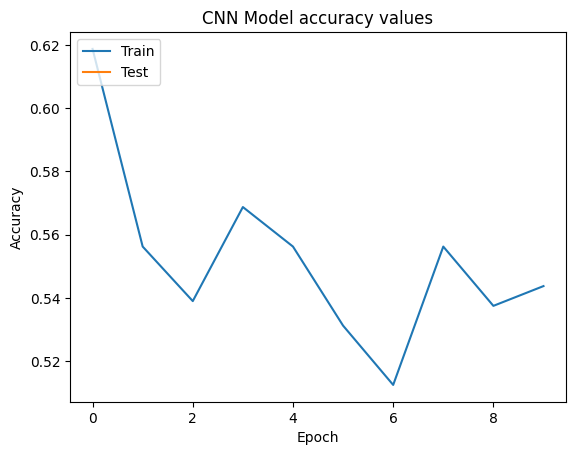

In [36]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
